## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget -O yourfile.csv https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv

--2024-05-18 05:27:08--  https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1858473 (1.8M) [text/plain]
Saving to: ‘yourfile.csv’

yourfile.csv        100%[===================>]   1.77M  --.-KB/s    in 0.009s  

2024-05-18 05:27:09 (200 MB/s) - ‘yourfile.csv’ saved [1858473/1858473]



In [3]:
!pip install chardet

## Load Data

In [4]:
import chardet
import pandas as pd

# Step 4: Detect the encoding
with open('yourfile.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Step 5: Read the CSV file with the detected encoding
tweet_df = pd.read_csv('yourfile.csv', encoding=encoding)

# Step 6: Display the first few rows of the DataFrame
tweet_df.head()

Detected encoding: ISO-8859-1


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


Terdapat 2 kolom. Label dan Tweet. Kolom Label berisi kelas dari tweet. Kelas Non_HS menandakan bahwa tweet tersebut bukan termasuk kategori hate speech. Kelas HS menandakan bahwa tweet tersebut termasuk kategori hate speech.

In [5]:
# contoh tweet Non_HS
tweet_df[tweet_df['HS']==1].head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
10,"Setidaknya gw punya jari tengah buat lu, sebel...",1,1,1,0,0,0,0,0,1,1,0,0
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,1,1,0,0,0,0,1,0,1,0,0


In [6]:
tweet_df['Tweet'][0]

"- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

In [7]:
# contoh tweet HS
tweet_df[tweet_df['HS']==1].head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
10,"Setidaknya gw punya jari tengah buat lu, sebel...",1,1,1,0,0,0,0,0,1,1,0,0
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,1,1,0,0,0,0,1,0,1,0,0


In [8]:
tweet_df['Tweet'][453]

"Kita-kita biasa aja dengan pernyataan yang ada. Ga ngerasa bangke.'"

In [9]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

Tidak ada missing values

## Class Distribution

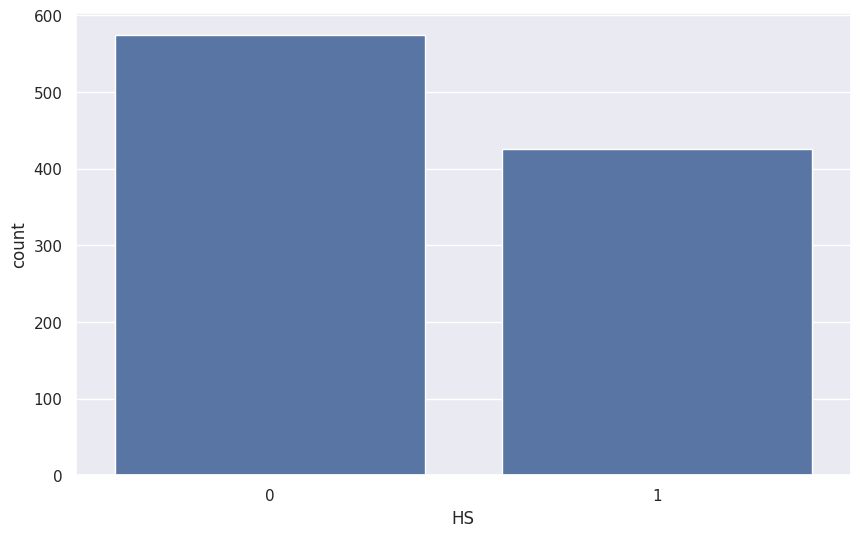

In [10]:
sample_df = tweet_df.sample(n=1000)  # Adjust the sample size as needed

plt.figure(figsize=(10, 6))
sns.countplot(data=sample_df, x='HS')
plt.show()

Jumlah kelas Non_HS lebih banyak dari jumlah kelas HS

In [11]:
jum_Non_HS = tweet_df[tweet_df['HS']==0]['HS'].count()
jum_HS = tweet_df[tweet_df['HS']==1]['HS'].count()

percent_Non_HS = (jum_Non_HS/(jum_Non_HS+jum_HS)*100)
percent_HS= (jum_HS/(jum_Non_HS+jum_Non_HS))*100
print(percent_Non_HS)
print(percent_HS)

57.77204039790417
36.547055730809674


In [12]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [13]:
# describe dataset
tweet_df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

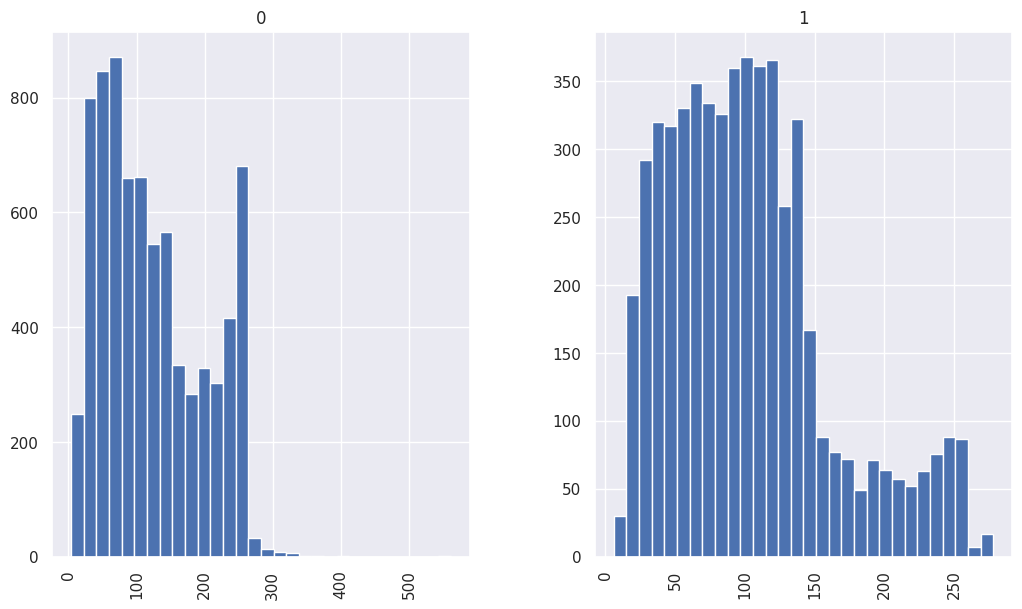

In [14]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='HS', bins=30, figsize=(12,7))

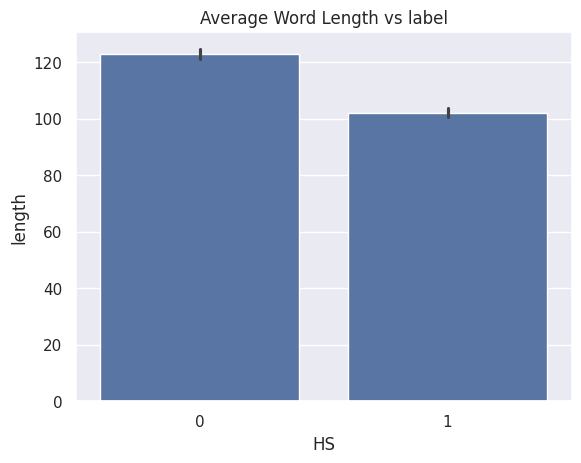

In [15]:
fig1 = sns.barplot(x='HS',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Preprocessing

In [16]:
df =tweet_df.copy()

### Case Folding

In [17]:
import re

In [18]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [19]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length,Case_folded
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,user user siapa yang telat ngasih tau elu edan...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,user user kaum cebong kapir udah keliatan dong...


### Tokenize

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [22]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length,Case_folded,Tokenized
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,user user siapa yang telat ngasih tau elu edan...,"[user, user, siapa, yang, telat, ngasih, tau, ..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,user user aku itu aku n nku tau matamu sipit t...,"[user, user, aku, itu, aku, n, nku, tau, matam..."
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,user user kaum cebong kapir udah keliatan dong...,"[user, user, kaum, cebong, kapir, udah, keliat..."


### Stemming

In [23]:
!pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git
!pip install Levenshtein

  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-9yeqdig3
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-9yeqdig3
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py) ... done
  Created wheel for mpstemmer: filename=mpstemmer-0.1.0-py3-none-any.whl size=99801 sha256=d405dab3822959bb17384d9458836991cb5c84e3a139ea7fb0552df5cccd1f83
  Stored in directory: /tmp/pip-ephem-wheel-cache-fgmyccf5/wheels/e0/b7/dd/9a80a3b7a05fe9e3252476ddf25da4faabddcec1b9e88fc32c
Successfully built mpstemmer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.3 MB/s eta 0:00:00


In [24]:
from mpstemmer import MPStemmer

stemmer = MPStemmer()


# Define the stemming function for lists of tokens
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply the stemming function to each list of tokens in the DataFrame
df['Stemmed'] = df['Tokenized'].apply(stem_tokens)

# Display the DataFrame
print(df.head())

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  length  \
0         1        1            0          0     138   
1         0     

### Slang Words Removal

In [25]:
import requests

In [26]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [27]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [28]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [29]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [30]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [31]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [32]:
df['No_Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length,Case_folded,Tokenized,Stemmed,No_Slang
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[saat, semua, cowok, usaha, lacak, perhati, sa..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,user user siapa yang telat ngasih tau elu edan...,"[user, user, siapa, yang, telat, ngasih, tau, ...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, siapa, yang, terlambat, asih, tah..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,user user aku itu aku n nku tau matamu sipit t...,"[user, user, aku, itu, aku, n, nku, tau, matam...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma..."
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,user user kaum cebong kapir udah keliatan dong...,"[user, user, kaum, cebong, kapir, udah, keliat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, sudah, lihat..."


### Stop Words Removal

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [34]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [35]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[cowok, usaha, lacak, perhati, lantas, remeh, ..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,user user siapa yang telat ngasih tau elu edan...,"[user, user, siapa, yang, telat, ngasih, tau, ...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, terlambat, asih, edan, sarap, gau..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, berfikir, percaya, tuhan, jatuh, kali..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,user user aku itu aku n nku tau matamu sipit t...,"[user, user, aku, itu, aku, n, nku, tau, matam...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, nku, mata, sipit, lihat, ']"
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,user user kaum cebong kapir udah keliatan dong...,"[user, user, kaum, cebong, kapir, udah, keliat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, lihat, dongo..."


## Encoding Target Value

In [36]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[cowok, usaha, lacak, perhati, lantas, remeh, ...",cowok usaha lacak perhati lantas remeh perhati...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,user user siapa yang telat ngasih tau elu edan...,"[user, user, siapa, yang, telat, ngasih, tau, ...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, terlambat, asih, edan, sarap, gau...",usar usar terlambat asih edan sarap gaul cigax...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, berfikir, percaya, tuhan, jatuh, kali...",kadang berfikir percaya tuhan jatuh kali kali ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,user user aku itu aku n nku tau matamu sipit t...,"[user, user, aku, itu, aku, n, nku, tau, matam...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, nku, mata, sipit, lihat, ']",usar usar nku mata sipit lihat '
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,user user kaum cebong kapir udah keliatan dong...,"[user, user, kaum, cebong, kapir, udah, keliat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, lihat, dongo...",usar usar kaum cebong kapir lihat dongok dongo...


## Combine Cleaned Tweet and Label

In [37]:
data1 = df[['Ready']]
data2 = df[['HS']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,HS
0,cowok usaha lacak perhati lantas remeh perhati...,1
1,usar usar terlambat asih edan sarap gaul cigax...,0
2,kadang berfikir percaya tuhan jatuh kali kali ...,0
3,usar usar nku mata sipit lihat ',0
4,usar usar kaum cebong kapir lihat dongok dongo...,1


## Text Vectorization (TF-IDF)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
X = dataset['Ready']
label = dataset['HS']

In [40]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(13169, 20891)

In [41]:
!pip install imblearn

## Dealing With Imbalance Class

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

In [43]:
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)


(15216, 20891)
(15216,)


## Split Data (Training and Testing Data)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12172, 20891)
(3044, 20891)
(12172,)
(3044,)


## Most Common Words VS Importants Words

In [46]:
# Get feature names using get_feature_names_out()
feature_names = tfidf_vectorizer.get_feature_names_out()


# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [47]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 sekira        0.0
bgthu         0.0
uthmaniyah    0.0
uupa          0.0
uwoy          0.0
maininnya     0.0
maitimo       0.0
majority      0.0
maljum        0.0
sekarnag      0.0
dtype: float64


Most important words:
 modar                 1.0
usar                  1.0
bebal                 1.0
jokowisayangipapua    1.0
menete                1.0
viral                 1.0
berak                 1.0
wkwkwkkwkwkwwk        1.0
umat                  1.0
mename                1.0
dtype: float64


##WordCloud

In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud

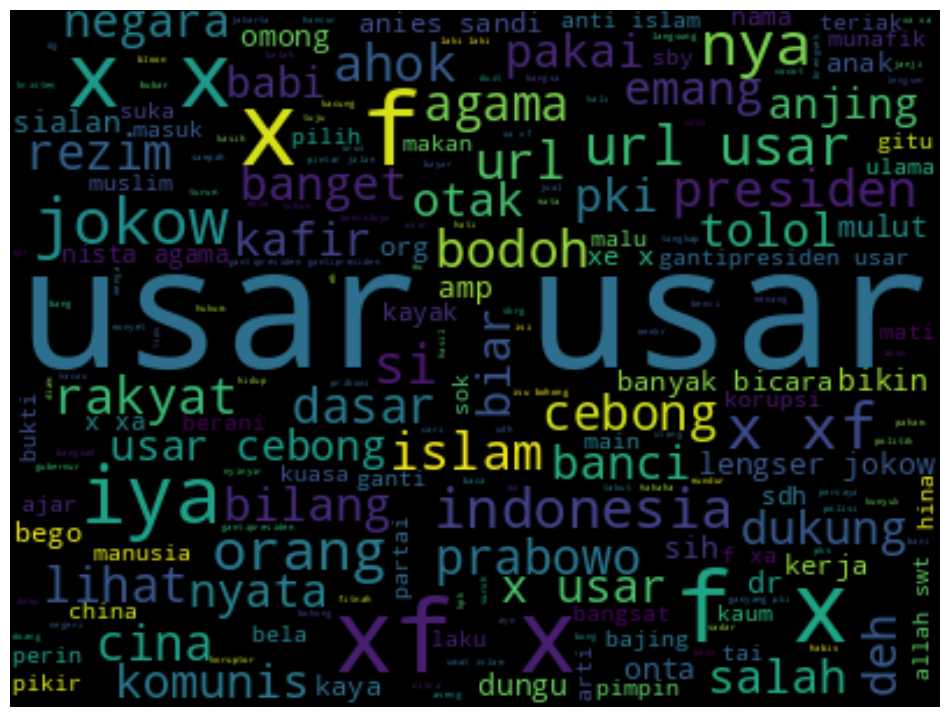

In [50]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['HS']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud

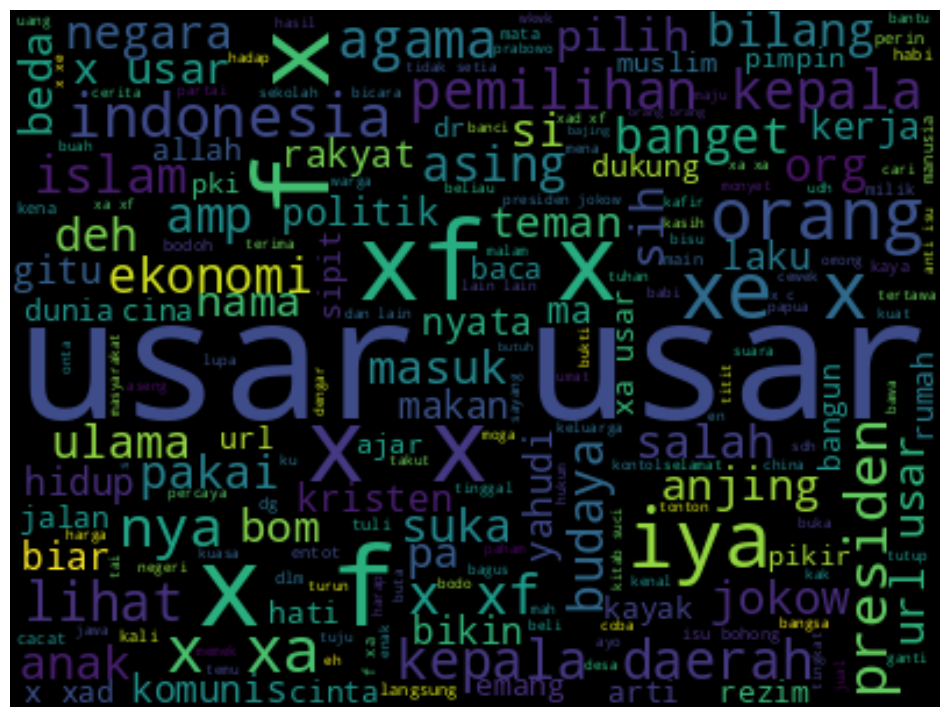

In [51]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['HS']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [52]:
!pip install mlxtend

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [54]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix,
              annot=True,
              xticklabels=classes,
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [57]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9429838974696023
0.8455978975032852


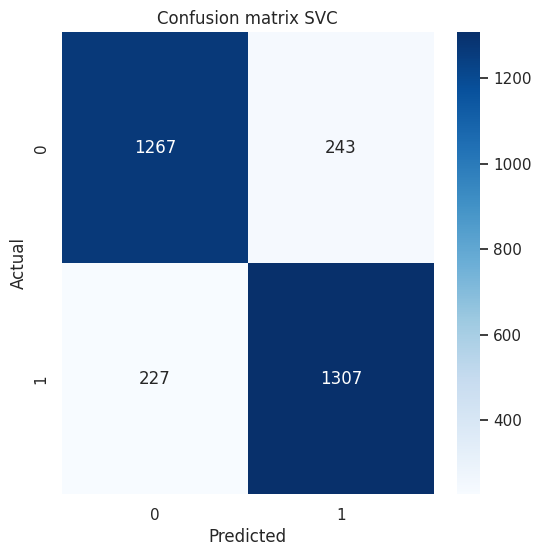

In [58]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [59]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1510
           1       0.84      0.85      0.85      1534

    accuracy                           0.85      3044
   macro avg       0.85      0.85      0.85      3044
weighted avg       0.85      0.85      0.85      3044



### XGBOOST

In [60]:
!pip install xgboost

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

In [63]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9056851790995728
0.8406701708278581


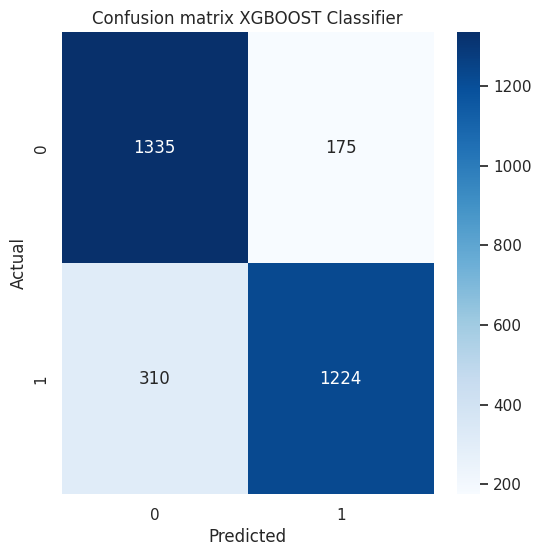

In [64]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [65]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1510
           1       0.87      0.80      0.83      1534

    accuracy                           0.84      3044
   macro avg       0.84      0.84      0.84      3044
weighted avg       0.84      0.84      0.84      3044



#### XGBOOOST - RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}


In [68]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [69]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075,
                                                          0.1],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 250, 500]},
                   scoring='f1', verbose=3)

In [70]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
random_search.best_params_

{'n_estimators': 250,
 'min_child_weight': 9,
 'max_depth': 7,
 'learning_rate': 0.075}

In [91]:
# Define the XGBClassifier with the missing parameter set
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0,
                          learning_rate=0.025, max_delta_step=0, max_depth=6,
                          min_child_weight=1, missing=np.nan,  # Specify how missing values are represented
                          n_estimators=250, n_jobs=1, nthread=None,
                          objective='binary:logistic', random_state=0,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                          seed=None, silent=None, subsample=1, verbosity=1)

# Train the model
xgb_rscv.fit(X_train, y_train)

# Predict on test data
y_pred_xgb_rscv = xgb_rscv.predict(X_test)

In [92]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.8319093000328623
0.7999342969776609


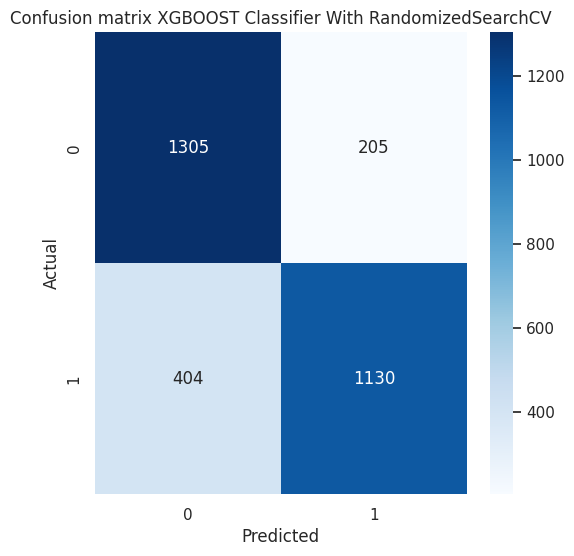

In [93]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

### Neural Network

In [73]:
!pip install tensorflow

In [74]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [75]:
!pip install pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import pandas as pd

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.toarray())
X_test_tensor = torch.Tensor(X_test.toarray())
y_train_tensor = torch.Tensor(y_train.values)
y_test_tensor = torch.Tensor(y_test.values)

# Create data loaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)

# Step 2: Define Your Model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=2)  # Output size is 2 for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Choose a Loss Function and Optimizer
model = SimpleNN(input_size=X_train_tensor.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training Loop
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

    # Step 5: Validation Loop
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10, Test Accuracy: 0.8551
Epoch 2/10, Test Accuracy: 0.8617
Epoch 3/10, Test Accuracy: 0.8614
Epoch 4/10, Test Accuracy: 0.8564
Epoch 5/10, Test Accuracy: 0.8518
Epoch 6/10, Test Accuracy: 0.8555
Epoch 7/10, Test Accuracy: 0.8466
Epoch 8/10, Test Accuracy: 0.8486
Epoch 9/10, Test Accuracy: 0.8469
Epoch 10/10, Test Accuracy: 0.8446


Test Accuracy: 0.8446


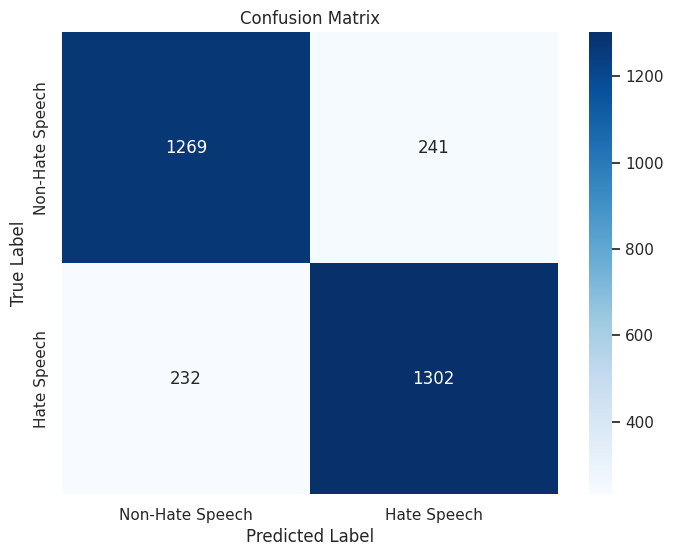

                 precision    recall  f1-score   support

Non-Hate Speech       0.85      0.84      0.84      1510
    Hate Speech       0.84      0.85      0.85      1534

       accuracy                           0.84      3044
      macro avg       0.84      0.84      0.84      3044
   weighted avg       0.84      0.84      0.84      3044



In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Step 5: Evaluation and Visualization
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Non-Hate Speech', 'Hate Speech'], yticklabels=['Non-Hate Speech', 'Hate Speech'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
from sklearn.metrics import classification_report

target_names = ['Non-Hate Speech', 'Hate Speech']
print(classification_report(all_labels, all_preds, target_names=target_names))

In [83]:
# Save the entire model
torch.save(model, 'Neural Network.pth')


## Model Comparison

In [96]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomizedSearchSV', 'Neural Network']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accRandomizedSearchCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accRandomizedSearchCV, accuracy]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.845598
1,XGBOOST,0.840670
2,RandomizedSearchSV,0.799934
3,Neural Network,0.844612


In [88]:
import joblib

# Saving model
joblib.dump(svc, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [89]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['Tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,HS_Moderate,HS_Strong,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,0,0,138,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[saat, semua, cowok, usaha, lacak, perhati, sa...","[cowok, usaha, lacak, perhati, lantas, remeh, ...",cowok usaha lacak perhati lantas remeh perhati...,Non_HS
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,0,0,120,user user siapa yang telat ngasih tau elu edan...,"[user, user, siapa, yang, telat, ngasih, tau, ...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, siapa, yang, terlambat, asih, tah...","[usar, usar, terlambat, asih, edan, sarap, gau...",usar usar terlambat asih edan sarap gaul cigax...,Non_HS
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,0,0,254,kadang aku berfikir kenapa aku tetap percaya p...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, berfikir, percaya, tuhan, jatuh, kali...",kadang berfikir percaya tuhan jatuh kali kali ...,Non_HS
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,0,0,75,user user aku itu aku n nku tau matamu sipit t...,"[user, user, aku, itu, aku, n, nku, tau, matam...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, aku, itu, aku, dan, nku, tahu, ma...","[usar, usar, nku, mata, sipit, lihat, ']",usar usar nku mata sipit lihat ',Non_HS
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,1,0,89,user user kaum cebong kapir udah keliatan dong...,"[user, user, kaum, cebong, kapir, udah, keliat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, sudah, lihat...","[usar, usar, kaum, cebong, kapir, lihat, dongo...",usar usar kaum cebong kapir lihat dongok dongo...,HS


## Predict New Data

In [102]:
input_tweet = ['dasar setan',
               'terima kasih KPU pilkada berjalan lancar mantap djiwa njir']

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib')
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n',
                input_tweet[i],
                '\nPrediction: \nHate Speech!\n')
        else:
            print('Input text:\n',
                input_tweet[i],
                "\nPrediction: \nNot a Hate Speech.\n")

predictNewData(input_tweet)

Input text:
 dasar setan 
Prediction: 
Hate Speech!

Input text:
 terima kasih KPU pilkada berjalan lancar mantap djiwa njir 
Prediction: 
Not a Hate Speech.

